*Eduardus Tjitrahardja | @edutjie | 2022*

# Feedforward - Batch Size 

## Importing Libraries

In [26]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn

from sklearn.datasets._samples_generator import make_blobs

from tensorflow.keras.layers import Dense
from tensorflow.keras.models import Sequential
from tensorflow.keras.optimizers import SGD
from tensorflow.keras.utils import to_categorical

plt.style.use('seaborn')

## Generating Dataset

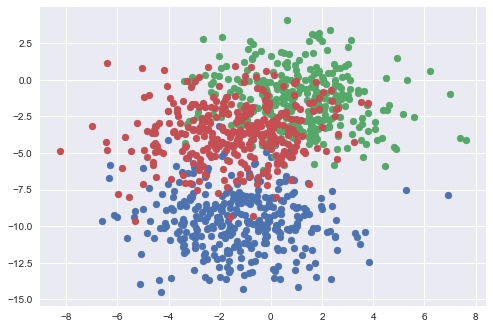

In [27]:
# generate 2d classification datasets
X, y = make_blobs(n_samples=1000, centers=3, n_features=2, cluster_std=2, random_state=2)

# scatter plot for each class value
for class_value in range(3):
    
    # select indices of points with the class label
    row_ix = np.where(y == class_value)
    # scatter plot for points with a different color
    plt.scatter(X[row_ix, 0], X[row_ix, 1])
    
# show plot
plt.show()

In [28]:
# one hot encode output variable
y = to_categorical(y)

# split into train and test
n_train = 500

X_train, X_test = X[:n_train, :], X[n_train:, :]
y_train, y_test = y[:n_train], y[n_train:]

In [29]:
y_test.shape

(500, 3)

## 1. Batch Gradient Descent (batch_size=train_size)

In [50]:
model = Sequential()
model.add(Dense(50, input_dim=2, activation="relu", kernel_initializer="he_uniform"))
model.add(Dense(3, activation="softmax"))

In [73]:
# compile model
optimizer = SGD(learning_rate=0.01, momentum=0.9)
model.compile(loss="categorical_crossentropy", optimizer=optimizer, metrics=["accuracy"])

In [32]:
model.summary()

Model: "sequential_2"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_4 (Dense)             (None, 50)                150       
                                                                 
 dense_5 (Dense)             (None, 3)                 153       
                                                                 
Total params: 303
Trainable params: 303
Non-trainable params: 0
_________________________________________________________________


In [52]:
# train model
history = model.fit(X_train, y_train, validation_data=(X_test, y_test), epochs=200, batch_size=len(X_train), verbose=1)

Epoch 1/200
1/1 [==============================] - 0s 308ms/step - loss: 3.1835 - accuracy: 0.3880 - val_loss: 2.3430 - val_accuracy: 0.4380
Epoch 2/200
1/1 [==============================] - 0s 29ms/step - loss: 2.4252 - accuracy: 0.4240 - val_loss: 3.0559 - val_accuracy: 0.4320
Epoch 3/200
1/1 [==============================] - 0s 34ms/step - loss: 3.2620 - accuracy: 0.4320 - val_loss: 2.4721 - val_accuracy: 0.4700
Epoch 4/200
1/1 [==============================] - 0s 25ms/step - loss: 2.6906 - accuracy: 0.4560 - val_loss: 1.3053 - val_accuracy: 0.5340
Epoch 5/200
1/1 [==============================] - 0s 32ms/step - loss: 1.4207 - accuracy: 0.5100 - val_loss: 2.1427 - val_accuracy: 0.4800
Epoch 6/200
1/1 [==============================] - 0s 25ms/step - loss: 2.2548 - accuracy: 0.4300 - val_loss: 1.9570 - val_accuracy: 0.4880
Epoch 7/200
1/1 [==============================] - 0s 30ms/step - loss: 2.0637 - accuracy: 0.4600 - val_loss: 1.8078 - val_accuracy: 0.5260
Epoch 8/200
1/1 [==

In [39]:
# evaluate model
def eval_model(model):
    _, train_acc = model.evaluate(X_train, y_train, verbose=0)
    _, test_acc = model.evaluate(X_test, y_test, verbose=0)
    print(f"Train: {train_acc:.3f}, Test: {test_acc:.3f}")

In [53]:
eval_model(model)

Train: 0.808, Test: 0.836


In [40]:
# plot training history
def plot_history(history):
    plt.plot(history.history['accuracy'], label='Train')
    plt.plot(history.history['val_accuracy'], label='Valid')
    plt.legend()
    plt.show()

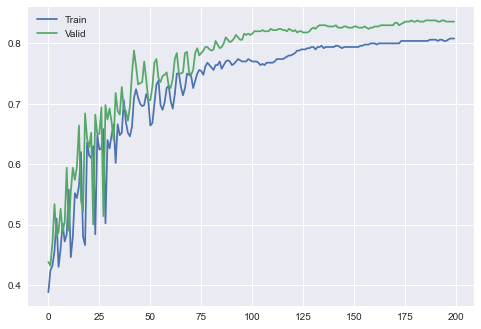

In [54]:
plot_history(history)

## 2. Stochastic Gradient Descent (batch_size=1)

In [36]:
model = Sequential()
model.add(Dense(50, input_dim=2, activation='relu', kernel_initializer='he_uniform'))
model.add(Dense(3, activation='softmax'))

In [72]:
# compile model
opt = SGD(learning_rate=0.01, momentum=0.9)
model.compile(loss='categorical_crossentropy', optimizer=opt, metrics=['accuracy'])

In [38]:
# train model
history = model.fit(X_train, y_train, validation_data=(X_test, y_test), epochs=200, batch_size=1, verbose=1)

Epoch 1/200
500/500 [==============================] - 2s 4ms/step - loss: 1.7965 - accuracy: 0.5000 - val_loss: 0.9738 - val_accuracy: 0.4900
Epoch 2/200
500/500 [==============================] - 2s 3ms/step - loss: 1.0111 - accuracy: 0.4660 - val_loss: 0.9097 - val_accuracy: 0.4840
Epoch 3/200
500/500 [==============================] - 2s 4ms/step - loss: 0.9348 - accuracy: 0.4800 - val_loss: 0.9384 - val_accuracy: 0.5740
Epoch 4/200
500/500 [==============================] - 2s 3ms/step - loss: 0.9633 - accuracy: 0.5320 - val_loss: 0.9241 - val_accuracy: 0.4720
Epoch 5/200
500/500 [==============================] - 2s 3ms/step - loss: 0.9597 - accuracy: 0.5240 - val_loss: 0.8507 - val_accuracy: 0.6120
Epoch 6/200
500/500 [==============================] - 2s 3ms/step - loss: 0.8514 - accuracy: 0.5900 - val_loss: 0.7608 - val_accuracy: 0.6840
Epoch 7/200
500/500 [==============================] - 2s 3ms/step - loss: 0.8438 - accuracy: 0.6260 - val_loss: 1.0505 - val_accuracy: 0.7020

In [41]:
eval_model(model)

Train: 0.486, Test: 0.500


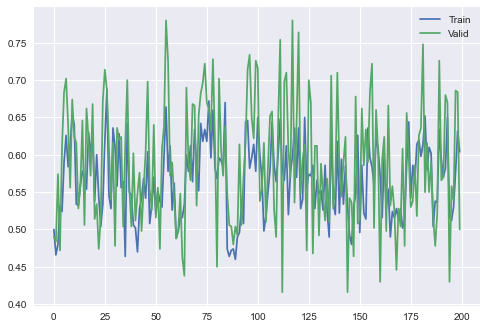

In [42]:
plot_history(history)

## 3. Stochastic Gradient Descent (batch_size=1, lr=0.001)

In [55]:
model = Sequential()
model.add(Dense(50, input_dim=2, activation='relu', kernel_initializer='he_uniform'))
model.add(Dense(3, activation='softmax'))

In [71]:
# compile model
opt = SGD(learning_rate=0.001, momentum=0.9)
model.compile(loss='categorical_crossentropy', optimizer=opt, metrics=['accuracy'])

In [57]:
history = model.fit(X_train, y_train, validation_data=(X_test, y_test), epochs=200, batch_size=1, verbose=1)

Epoch 1/200
500/500 [==============================] - 2s 4ms/step - loss: 2.2987 - accuracy: 0.5580 - val_loss: 1.9561 - val_accuracy: 0.4600
Epoch 2/200
500/500 [==============================] - 2s 4ms/step - loss: 0.9981 - accuracy: 0.6680 - val_loss: 1.1495 - val_accuracy: 0.5100
Epoch 3/200
500/500 [==============================] - 2s 3ms/step - loss: 0.7537 - accuracy: 0.7080 - val_loss: 0.5454 - val_accuracy: 0.8060
Epoch 4/200
500/500 [==============================] - 2s 3ms/step - loss: 0.5633 - accuracy: 0.7680 - val_loss: 0.5534 - val_accuracy: 0.7840
Epoch 5/200
500/500 [==============================] - 2s 4ms/step - loss: 0.5599 - accuracy: 0.7640 - val_loss: 0.4971 - val_accuracy: 0.8160
Epoch 6/200
500/500 [==============================] - 2s 4ms/step - loss: 0.4801 - accuracy: 0.7940 - val_loss: 0.4814 - val_accuracy: 0.7960
Epoch 7/200
500/500 [==============================] - 2s 4ms/step - loss: 0.4997 - accuracy: 0.8040 - val_loss: 0.4451 - val_accuracy: 0.8260

In [59]:
eval_model(model)

Train: 0.842, Test: 0.820


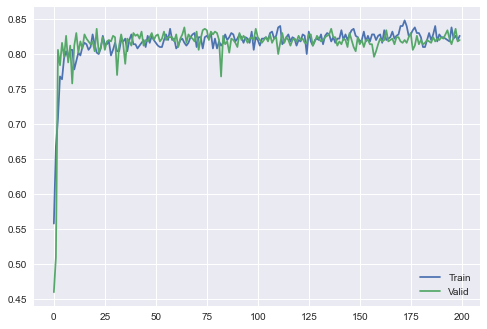

In [60]:
plot_history(history)

## 4. Mini Batch Size on Model Behavior (batch_size=32, lr=0.01)

In [61]:
model = Sequential()
model.add(Dense(50, input_dim=2, activation='relu', kernel_initializer='he_uniform'))
model.add(Dense(3, activation='softmax'))

In [70]:
# compile model
opt = SGD(learning_rate=0.01, momentum=0.9)
model.compile(loss='categorical_crossentropy', optimizer=opt, metrics=['accuracy'])

In [63]:
history = model.fit(X_train, y_train, validation_data=(X_test, y_test), epochs=200, batch_size=32, verbose=1)

Epoch 1/200
16/16 [==============================] - 0s 17ms/step - loss: 4.9522 - accuracy: 0.4560 - val_loss: 3.0703 - val_accuracy: 0.6120
Epoch 2/200
16/16 [==============================] - 0s 11ms/step - loss: 2.8694 - accuracy: 0.5720 - val_loss: 1.4169 - val_accuracy: 0.6260
Epoch 3/200
16/16 [==============================] - 0s 5ms/step - loss: 1.9842 - accuracy: 0.5420 - val_loss: 1.6838 - val_accuracy: 0.6400
Epoch 4/200
16/16 [==============================] - 0s 5ms/step - loss: 1.2312 - accuracy: 0.6300 - val_loss: 0.8746 - val_accuracy: 0.7180
Epoch 5/200
16/16 [==============================] - 0s 5ms/step - loss: 0.9359 - accuracy: 0.6560 - val_loss: 0.7322 - val_accuracy: 0.6800
Epoch 6/200
16/16 [==============================] - 0s 5ms/step - loss: 0.7080 - accuracy: 0.7120 - val_loss: 0.5405 - val_accuracy: 0.7860
Epoch 7/200
16/16 [==============================] - 0s 6ms/step - loss: 0.5694 - accuracy: 0.7400 - val_loss: 0.5806 - val_accuracy: 0.7720
Epoch 8/200

In [64]:
eval_model(model)

Train: 0.828, Test: 0.818


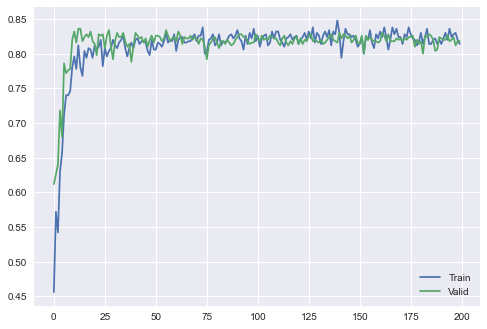

In [65]:
plot_history(history)

## 5. Effect of Batch Size on Model Behavior

In [66]:
# prepare train and test dataset
def prepare_data():
    # generate 2d classification dataset
    X, y = make_blobs(n_samples=1000, centers=3, n_features=2, cluster_std=2, random_state=2)

    # one hot encode output variable
    y = to_categorical(y)
    
    # split into train and valid
    n_train = 500
    X_train, X_test = X[:n_train, :], X[n_train:, :]
    y_train, y_test = y[:n_train], y[n_train:]
    return X_train, X_test, y_train, y_test

In [69]:
# fit a model and plot learning curve
def fit_model(X_train, y_train, X_test, y_test, n_batch):
    # define model
    model = Sequential()
    model.add(Dense(50, input_dim=2, activation='relu', kernel_initializer='he_uniform'))
    model.add(Dense(3, activation='softmax'))

    # compile model
    opt = SGD(learning_rate=0.01, momentum=0.9)
    model.compile(loss='categorical_crossentropy', optimizer=opt, metrics=['accuracy'])
    
    # fit model
    history = model.fit(X_train, y_train, validation_data=(X_test, y_test), epochs=200, verbose=0, batch_size=n_batch)
    
    # plot learning curves
    plt.plot(history.history['accuracy'], label='train')
    plt.plot(history.history['val_accuracy'], label='test')
    plt.title('batch='+str(n_batch))
    plt.legend()

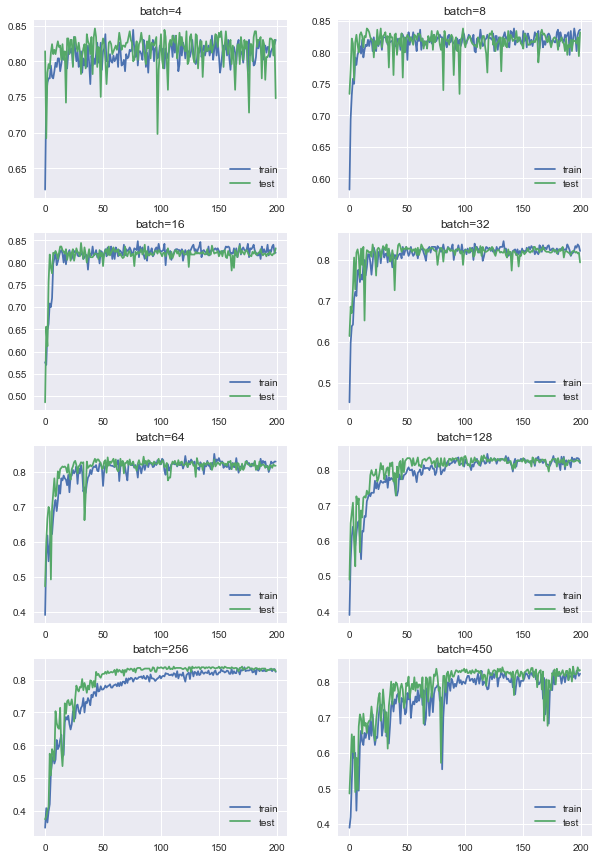

In [80]:
# prepare dataset
X_train, X_test, y_train, y_test = prepare_data()

# create learning curves for different batch sizes
batch_sizes = [4, 8, 16, 32, 64, 128, 256, 450]

plt.figure(figsize=(10, 15))
for i in range(len(batch_sizes)):
    
    # determine the plot number
    plot_no = 420 + (i+1)
    plt.subplot(plot_no)
    
    # fit model and plot learning curves for a batch size
    fit_model(X_train, y_train, X_test, y_test, batch_sizes[i])

# show learning curves
plt.show()